In [2]:
import pandas as pd
import json as json
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import ast
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar Data Sets
dfMoviesFinal = pd.read_csv('C:/Users/Pablo/OneDrive/Henry/MoralesPI_01/Data/dfMoviesNormal.csv', dtype=str, encoding='UTF-8', decimal='.', quotechar='"')


In [39]:
dfCreditsFinal = pd.read_csv('C:/Users/Pablo/OneDrive/Henry/MoralesPI_01/Data/dfCreditsNormal.csv', dtype=str, encoding='UTF-8', decimal='.', quotechar='"')

In [ ]:
dfMoviesFinal.drop(columns=['id_genres', 'id_production_companies', 'iso_3166_1_production_countries', 'iso_639_1_spoken_languages' ], inplace=True)


In [ ]:
dfMoviesFinal.drop(columns=['name_spoken_languages', 'status'], inplace=True)

In [6]:
dfMoviesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581957 entries, 0 to 581956
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   budget                     581957 non-null  object
 1   id_pelicula                581957 non-null  object
 2   original_language          581861 non-null  object
 3   overview                   579126 non-null  object
 4   popularity                 581957 non-null  object
 5   release_date               581957 non-null  object
 6   revenue                    581957 non-null  object
 7   runtime                    581374 non-null  object
 8   tagline                    340712 non-null  object
 9   title                      581957 non-null  object
 10  vote_average               581957 non-null  object
 11  vote_count                 581957 non-null  object
 12  release_year               581957 non-null  object
 13  return                     581957 non-null  

In [8]:
dfMoviesFinal = dfMoviesFinal.drop_duplicates(subset='id_pelicula', keep='first')

In [9]:
# Lista de columnas
columns_to_describe = ['budget', 'id_pelicula', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return','release_year']

# Convertir columnas a tipo numérico
dfMoviesFinal[columns_to_describe] = dfMoviesFinal[columns_to_describe].apply(pd.to_numeric, errors='coerce')

# Verificar si hay columnas vacías después de la conversión
print(dfMoviesFinal[columns_to_describe].isnull().sum())


budget            0
id_pelicula       0
popularity        0
revenue           0
runtime         246
vote_average      0
vote_count        0
return            0
release_year      0
dtype: int64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\694403813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMoviesFinal[columns_to_describe] = dfMoviesFinal[columns_to_describe].apply(pd.to_numeric, errors='coerce')


In [10]:
# Verificar los tipos de datos de las columnas
print(dfMoviesFinal.dtypes)

budget                       float64
id_pelicula                    int64
original_language             object
overview                      object
popularity                   float64
release_date                  object
revenue                        int64
runtime                      float64
tagline                       object
title                         object
vote_average                 float64
vote_count                   float64
release_year                 float64
return                       float64
name_genres                   object
name_production_companies     object
name_production_countries     object
dtype: object


In [62]:
# Filtrar solo columnas numéricas
numeric_columns = dfMoviesFinal.select_dtypes(include=['float64', 'int64']).columns

Extrar Valores outliders



Descripción de las columnas seleccionadas:
         popularity       runtime  vote_average  release_year
count  45346.000000  45100.000000  45346.000000  45346.000000
mean       2.926188     94.177805      5.624196   1991.882834
std        6.010970     38.348775      1.915339     24.053040
min        0.000000      0.000000      0.000000   1874.000000
25%        0.388732     85.000000      5.000000   1978.000000
50%        1.130176     95.000000      6.000000   2001.000000
75%        3.689337    107.000000      6.800000   2010.000000
max      547.488298   1256.000000     10.000000   2020.000000
Límites de los bigotes para 'popularity':
  Inferior: 0.0
  Superior: 8.639067
Límites de los bigotes para 'runtime':
  Inferior: 52.0
  Superior: 140.0
Límites de los bigotes para 'vote_average':
  Inferior: 2.4
  Superior: 9.5
Límites de los bigotes para 'release_year':
  Inferior: 1930.0
  Superior: 2020.0

DataFrame después de ajustar los valores:
        budget  id_pelicula original_languag

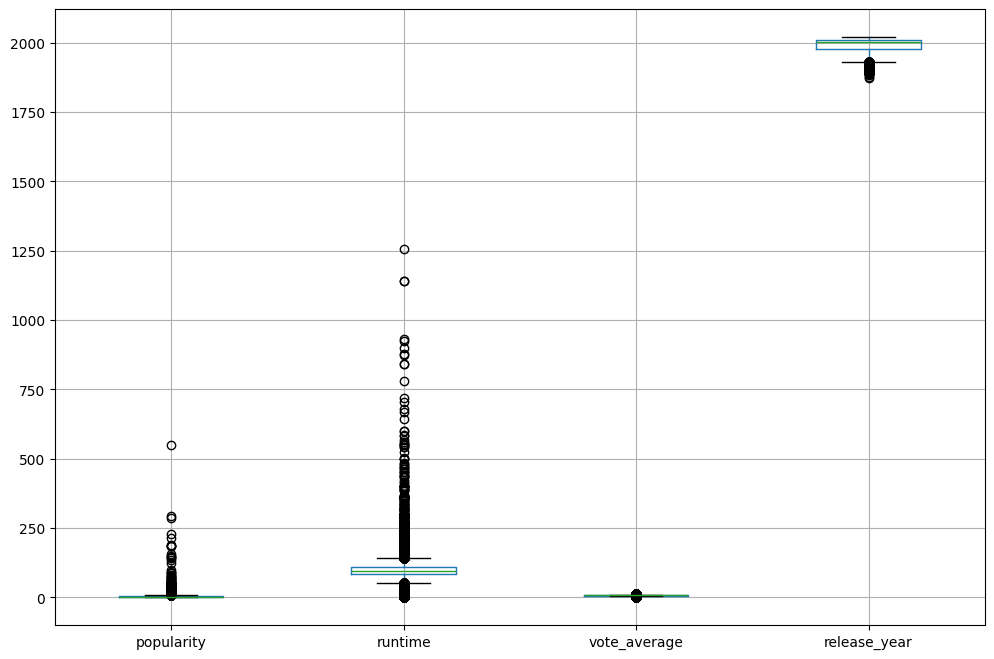

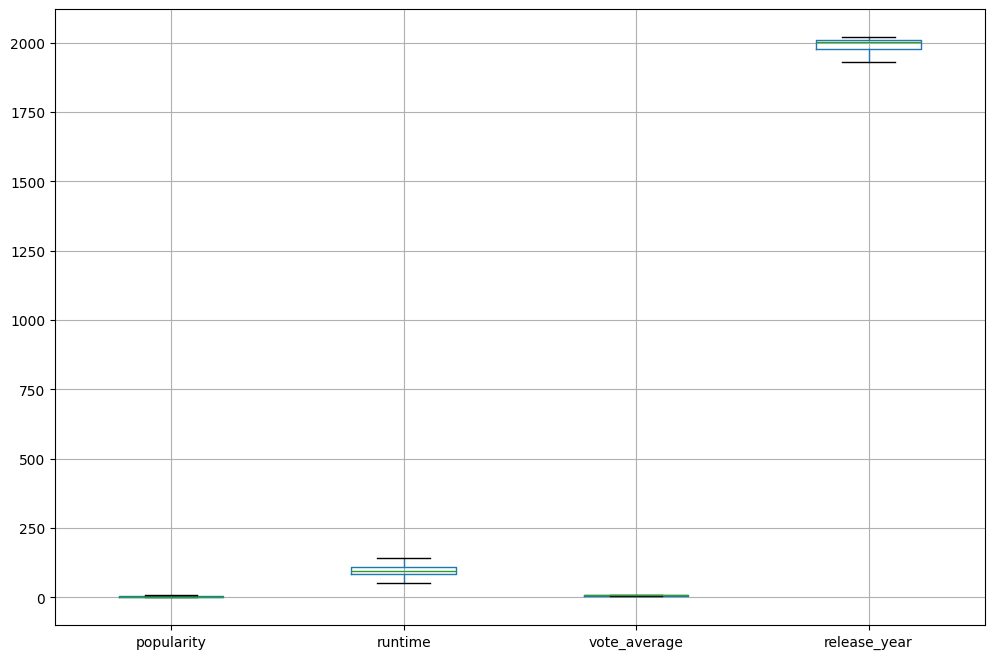

In [11]:
# Crear una copia del DataFrame
dfMoviesSintetico_copia = dfMoviesFinal.copy()

# Verificar la descripción de las columnas seleccionadas
columns_to_describe = ['popularity', 'runtime', 'vote_average', 'release_year']
print("\nDescripción de las columnas seleccionadas:")
print(dfMoviesFinal[columns_to_describe].describe())  # Selección correcta de columnas

# Obtener los valores de los bigotes (whiskers) usando matplotlib
plt.figure(figsize=(12, 8))
boxplot_dict = dfMoviesFinal.boxplot(column=columns_to_describe, return_type='dict')  # Obtener los datos del boxplot

# Extraer los valores de los bigotes para cada columna seleccionada
whiskers_dict = {}
for i, column in enumerate(columns_to_describe):
    whiskers = boxplot_dict['whiskers'][2*i:2*i+2]  # Hay dos bigotes por columna
    lower_whisker = whiskers[0].get_ydata()[1]  # El valor inferior del bigote
    upper_whisker = whiskers[1].get_ydata()[1]  # El valor superior del bigote
    whiskers_dict[column] = (lower_whisker, upper_whisker)
    print(f"Límites de los bigotes para '{column}':")
    print(f"  Inferior: {lower_whisker}")
    print(f"  Superior: {upper_whisker}")

# Reemplazar los valores fuera de los límites de los bigotes en la copia del DataFrame
for column, (lower_whisker, upper_whisker) in whiskers_dict.items():
    dfMoviesSintetico_copia[column] = dfMoviesSintetico_copia[column].clip(lower=lower_whisker, upper=upper_whisker)

# Verificar el resultado
print("\nDataFrame después de ajustar los valores:")
print(dfMoviesSintetico_copia.head())

# Obtener los valores de los bigotes (whiskers) usando matplotlib
plt.figure(figsize=(12, 8))
boxplot_dict = dfMoviesSintetico_copia.boxplot(column=columns_to_describe, return_type='dict')  # Obtener los datos del boxplot


In [12]:
# Distribución de categorías
categorical_columns = [
    'name_genres', 
    'name_production_companies', 
    'name_production_countries', 
    'original_language'
]

for column in categorical_columns:
    print(f"\nDistribución para la columna {column}:")
    print(dfMoviesSintetico_copia[column].value_counts())


Distribución para la columna name_genres:
name_genres
Drama              11948
Comedy              8815
Action              4484
Documentary         3402
Horror              2619
Crime               1683
Thriller            1663
Adventure           1508
Romance             1191
Animation           1122
Fantasy              703
Science Fiction      646
Mystery              552
Family               524
Music                487
Western              451
TV Movie             389
War                  379
History              278
Foreign              118
Name: count, dtype: int64

Distribución para la columna name_production_companies:
name_production_companies
Paramount Pictures                        996
Metro-Goldwyn-Mayer (MGM)                 851
Twentieth Century Fox Film Corporation    780
Warner Bros.                              757
Universal Pictures                        754
                                         ... 
Pax Films                                   1
Lamplight Film

Escalar Valores

In [14]:
dfMoviesSintetico_copia = dfMoviesFinal.copy()

In [15]:
# Lista de columnas numéricas para analizar
numeric_columns = [
    'popularity', 
    'revenue', 
    'runtime', 
    'vote_average', 
    'vote_count', 
    'release_year', 
    'return'
]

# Supongamos que dfMoviesSintetico_copia es tu DataFrame
# Seleccionar solo las columnas numéricas
df_numeric = dfMoviesSintetico_copia[numeric_columns]

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Opcional: Puedes combinar el DataFrame escalado con el DataFrame original si lo deseas
dfMoviesSintetico_copia_scaled = dfMoviesSintetico_copia.copy()
dfMoviesSintetico_copia_scaled[numeric_columns] = df_scaled

# Mostrar las primeras filas del DataFrame escalado
print(dfMoviesSintetico_copia_scaled.head())


        budget  id_pelicula original_language  \
0   30000000.0          862                en   
12  65000000.0         8844                en   
30         0.0        15602                en   
46  16000000.0        31357                en   
49         0.0        11862                en   

                                             overview  popularity  \
0   Led by Woody, Andy's toys live happily in his ...    3.164375   
12  When siblings Judy and Peter discover an encha...    1.532972   
30  A family wedding reignites the ancient feud be...    1.090543   
46  Cheated on, mistreated and stepped on, the wom...    2.583845   
49  Just when George Banks has recovered from his ...    2.225336   

   release_date   revenue   runtime  \
0    1995-10-30  5.625290 -0.343634   
12   1995-12-15  0.001780 -0.421864   
30   1995-12-22  2.620222  0.125747   
46   1995-12-22  4.907347  0.855896   
49   1995-02-10  0.187984  0.308284   

                                              tagline  

Analisis de Covarianzas

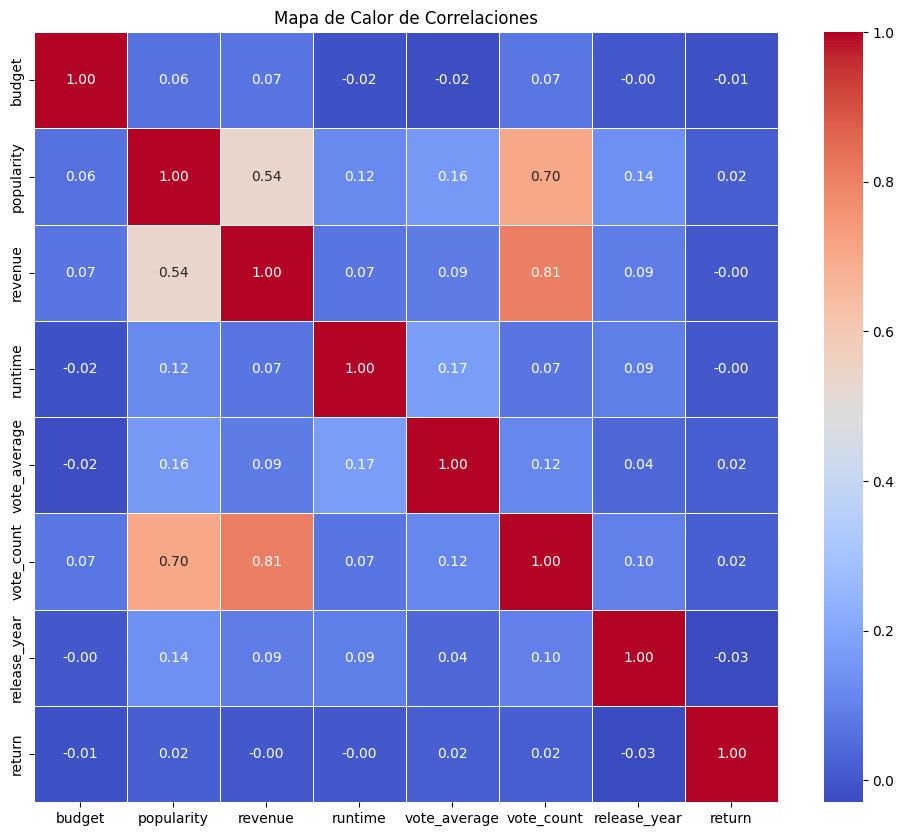

In [16]:
# Filtrar solo las columnas numéricas
numeric_columns = dfMoviesSintetico_copia_scaled.select_dtypes(include='number').drop(columns=['id_pelicula'], inplace=False)

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

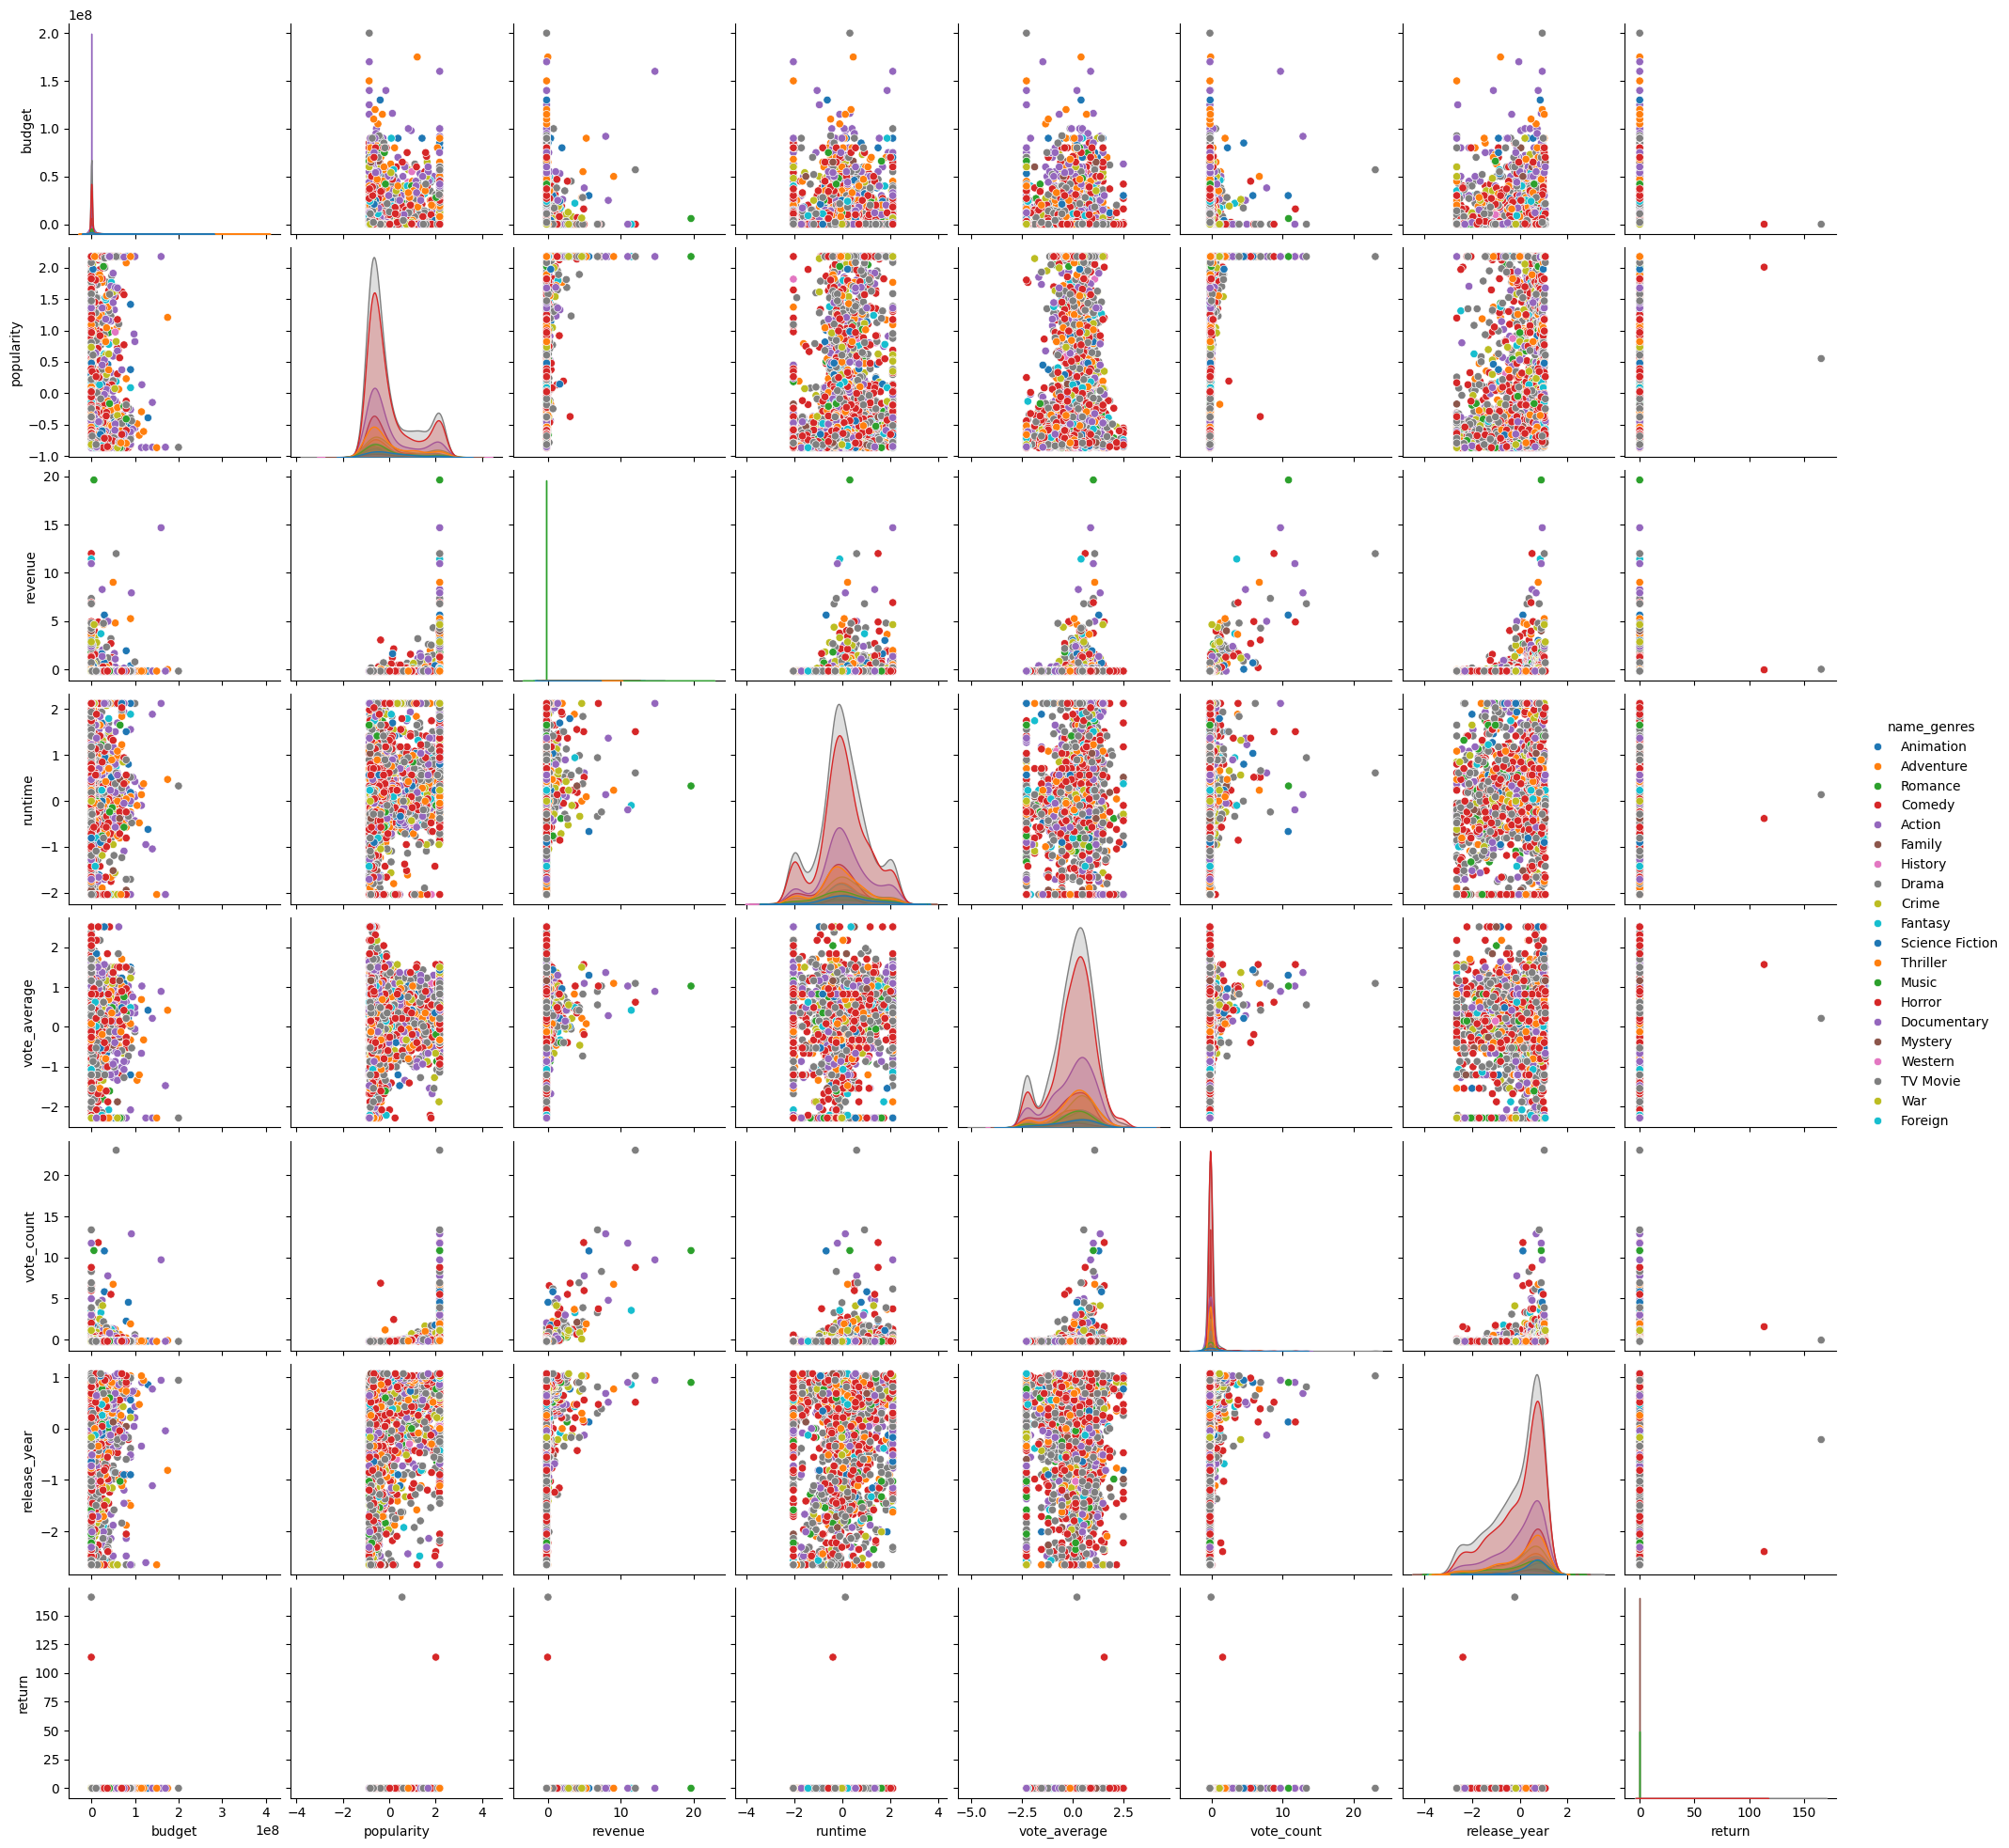

In [69]:
# Filtrar solo las columnas numéricas
numeric_columns = dfMoviesSintetico_copia_scaled.select_dtypes(include='number').drop(columns=['id_pelicula'], inplace=False)

# Agregar una columna categórica para usar en hue en el pairplot
dfMovies_filtered = dfMoviesSintetico_copia_scaled.copy()  # Crear una copia del DataFrame original
dfMovies_filtered = dfMovies_filtered[numeric_columns.columns.tolist() + ['name_genres']]

# Filtrar para eliminar filas con valores NaN en la columna categórica 
dfMovies_filtered = dfMovies_filtered.dropna(subset=['name_genres'])

# Crear el pairplot
sns.pairplot(dfMovies_filtered, hue='name_genres', palette='tab10')  

# Mostrar el gráfico
plt.show()

Data Frames credits

In [40]:
# Eliminar columnas 
dfCreditsFinal.drop(columns=['profile_path_cast', 'id_crew', 'cast_id_cast'], inplace=True)

In [41]:
# Eliminar columnas 
dfCreditsFinal.drop(columns=['credit_id_cast', 'id_cast', 'credit_id_crew', 'department_crew', 'profile_path_crew'], inplace=True)

In [55]:
# Crear el primer DataFrame con las columnas especificadas
dfCast = dfCreditsFinal[['id_pelicula', 'character_cast', 'gender_cast', 'name_cast', 'order_cast']]

# Crear el segundo DataFrame con las columnas especificadas
dfCrew = dfCreditsFinal[['id_pelicula', 'gender_crew', 'job_crew', 'name_crew']]


In [43]:
dfCast

,id_pelicula,character_cast,gender_cast,name_cast,order_cast
0,862,Woody (voice),2.0,Tom Hanks,0.0
1,862,Woody (voice),2.0,Tom Hanks,0.0
2,862,Woody (voice),2.0,Tom Hanks,0.0
3,862,Woody (voice),2.0,Tom Hanks,0.0
4,862,Woody (voice),2.0,Tom Hanks,0.0
...,...,...,...,...,...
7188067,265712,野比玉子/大雄媽媽,0.0,許淑嬪,23.0
7188068,265712,野比大助/大雄爸爸,0.0,劉傑,24.0
7188069,265712,野比大助/大雄爸爸,0.0,劉傑,24.0
7188070,265712,野比大助/大雄爸爸,0.0,劉傑,24.0


In [56]:
# Eliminar filas duplicadas basadas en las columnas 'name_cast' y 'character_cast'
dfCastFinal = dfCast.drop_duplicates(subset=['name_cast', 'character_cast'], keep='first')


In [57]:
# Filtrar el campo tipo de trabajo que solo voy a usar: Director
dfCrewFinal = dfCrew[dfCrew['job_crew'].str.strip().str.lower() == 'director']

In [58]:
# Eliminar duplicados
dfCrewFinal = dfCrewFinal.drop_duplicates(subset='name_crew')


In [18]:
dfMoviesFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 581956
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   budget                     45346 non-null  float64
 1   id_pelicula                45346 non-null  int64  
 2   original_language          45335 non-null  object 
 3   overview                   44405 non-null  object 
 4   popularity                 45346 non-null  float64
 5   release_date               45346 non-null  object 
 6   revenue                    45346 non-null  int64  
 7   runtime                    45100 non-null  float64
 8   tagline                    20387 non-null  object 
 9   title                      45346 non-null  object 
 10  vote_average               45346 non-null  float64
 11  vote_count                 45346 non-null  float64
 12  release_year               45346 non-null  float64
 13  return                     45346 non-null  float64

In [19]:
print(dfMoviesFinal.isnull().sum())

budget                           0
id_pelicula                      0
original_language               11
overview                       941
popularity                       0
release_date                     0
revenue                          0
runtime                        246
tagline                      24959
title                            0
vote_average                     0
vote_count                       0
release_year                     0
return                           0
name_genres                   2384
name_production_companies    11789
name_production_countries     6208
dtype: int64


In [20]:
# 1. Imputar columnas numéricas
# Imputar 'runtime' con la mediana
median_runtime = dfMoviesFinal['runtime'].median()
dfMoviesFinal['runtime'].fillna(median_runtime, inplace=True)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\3252243901.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfMoviesFinal['runtime'].fillna(median_runtime, inplace=True)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\3252243901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMoviesFinal['runtime'].fillna(median_runtime, inplace=T

In [21]:
# 2. Imputar columnas categóricas
# Imputar con 'Desconocido' o una categoría similar
categorical_columns = [
    'overview', 'tagline', 'name_genres',
    'name_production_companies', 'name_production_countries', 'original_language'
]
for column in categorical_columns:
    dfMoviesFinal[column].fillna('Desconocido', inplace=True)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\1566219173.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfMoviesFinal[column].fillna('Desconocido', inplace=True)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\1566219173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMoviesFinal[column].fillna('Desconocido', inplace=True)


In [22]:
dfMoviesFinal

,budget,id_pelicula,original_language,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,release_year,return,name_genres,name_production_companies,name_production_countries
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Desconocido,Toy Story,7.7,5415.0,1995.0,12.451801,Animation,Pixar Animation Studios,United States of America
12,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.043035,Adventure,TriStar Pictures,United States of America
30,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,0.000000,Romance,Warner Bros.,United States of America
46,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,5.090760,Comedy,Twentieth Century Fox Film Corporation,United States of America
49,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,0.000000,Comedy,Sandollar Productions,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581903,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,Desconocido,Robin Hood,5.7,26.0,1991.0,0.000000,Drama,Westdeutscher Rundfunk (WDR),Canada
581951,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0,360.0,Desconocido,Century of Birthing,9.0,3.0,2011.0,0.000000,Drama,Sine Olivia,Philippines
581952,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0,90.0,A deadly game of wits.,Betrayal,3.8,6.0,2003.0,0.000000,Action,American World Pictures,United States of America
581955,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0,87.0,Desconocido,Satan Triumphant,0.0,0.0,1917.0,0.000000,Desconocido,Yermoliev,Russia


In [23]:
# DataFrame después de la imputación
print(dfMoviesFinal.isnull().sum())

budget                       0
id_pelicula                  0
original_language            0
overview                     0
popularity                   0
release_date                 0
revenue                      0
runtime                      0
tagline                      0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
name_genres                  0
name_production_companies    0
name_production_countries    0
dtype: int64


In [24]:
# Distribución de categorías
categorical_columns = [
    'name_genres', 
    'name_production_companies', 
    'name_production_countries', 
    'original_language'
]

for column in categorical_columns:
    print(f"\nDistribución para la columna {column}:")
    print(dfMoviesFinal[column].value_counts())


Distribución para la columna name_genres:
name_genres
Drama              11948
Comedy              8815
Action              4484
Documentary         3402
Horror              2619
Desconocido         2384
Crime               1683
Thriller            1663
Adventure           1508
Romance             1191
Animation           1122
Fantasy              703
Science Fiction      646
Mystery              552
Family               524
Music                487
Western              451
TV Movie             389
War                  379
History              278
Foreign              118
Name: count, dtype: int64

Distribución para la columna name_production_companies:
name_production_companies
Desconocido                               11789
Paramount Pictures                          996
Metro-Goldwyn-Mayer (MGM)                   851
Twentieth Century Fox Film Corporation      780
Warner Bros.                                757
                                          ...  
Pax Films              

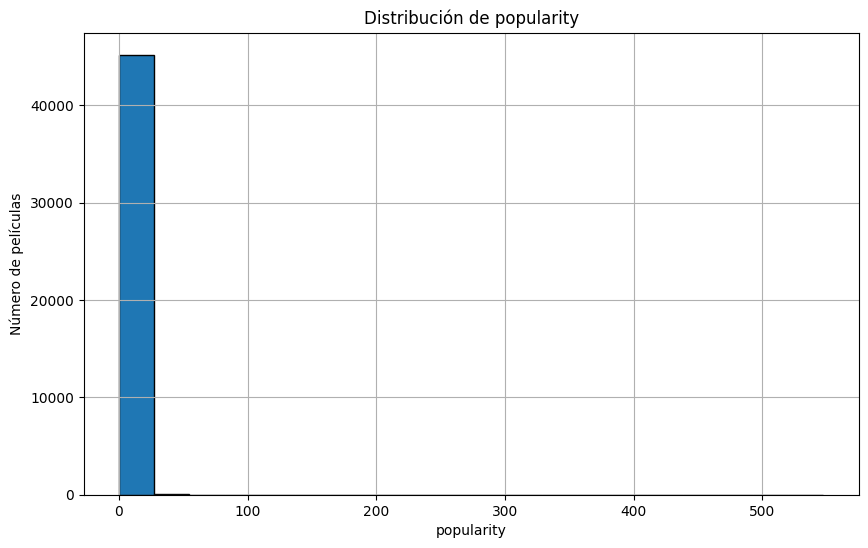

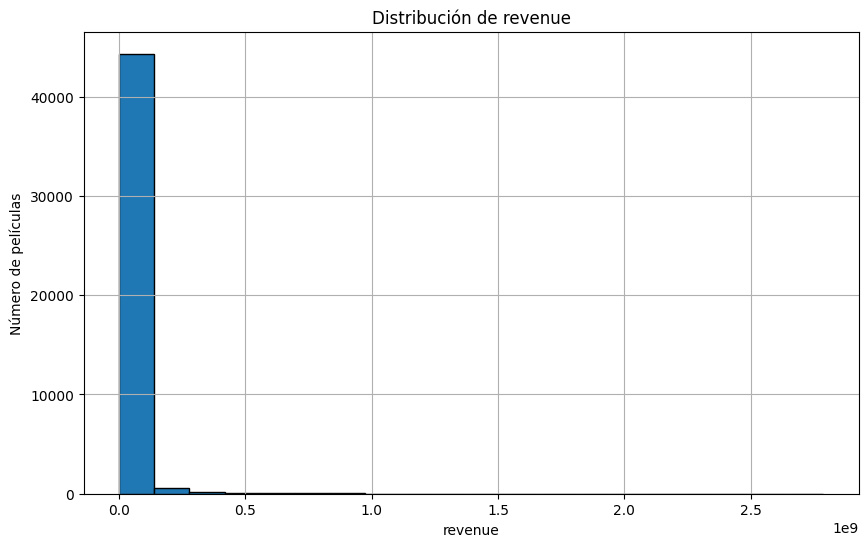

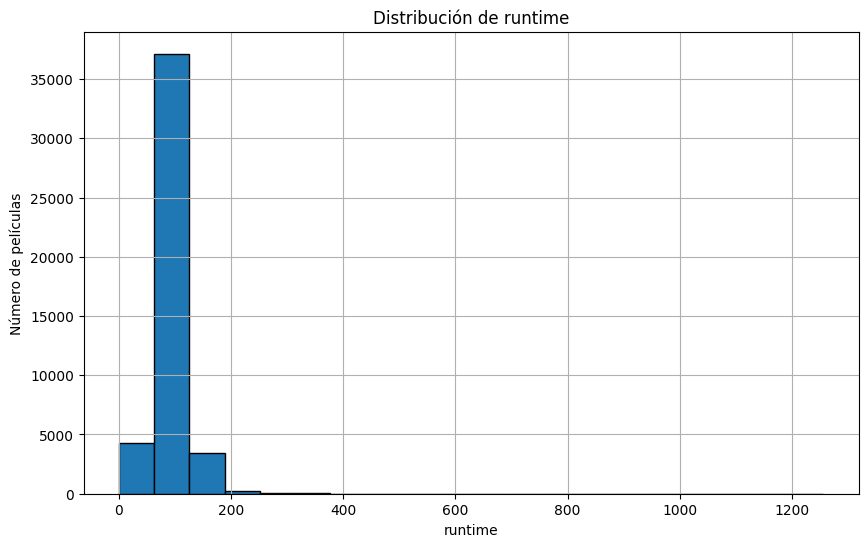

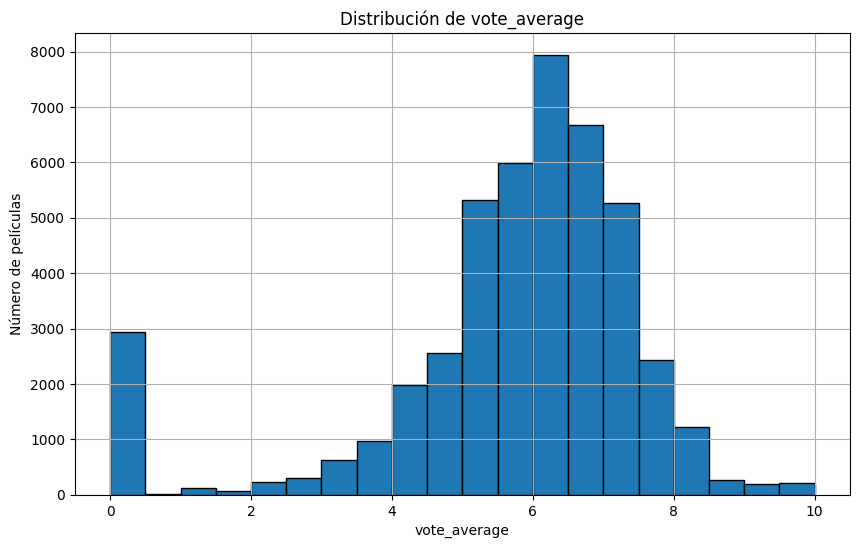

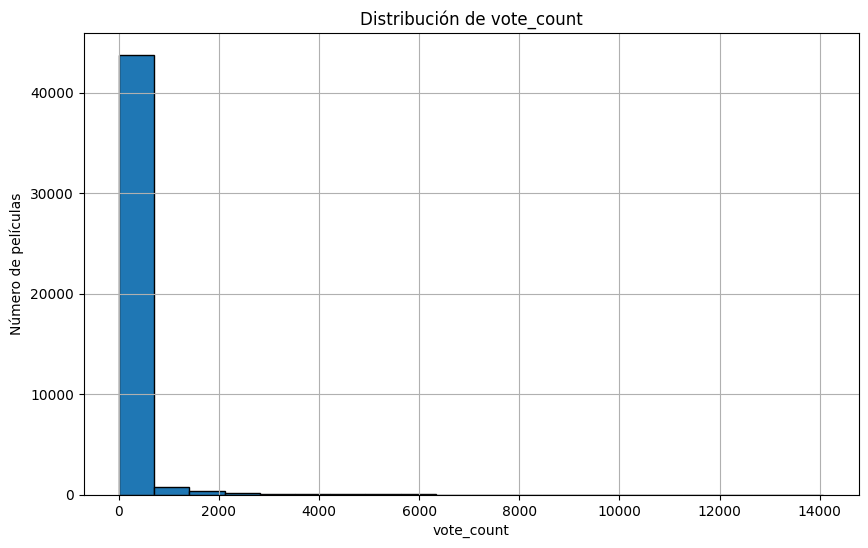

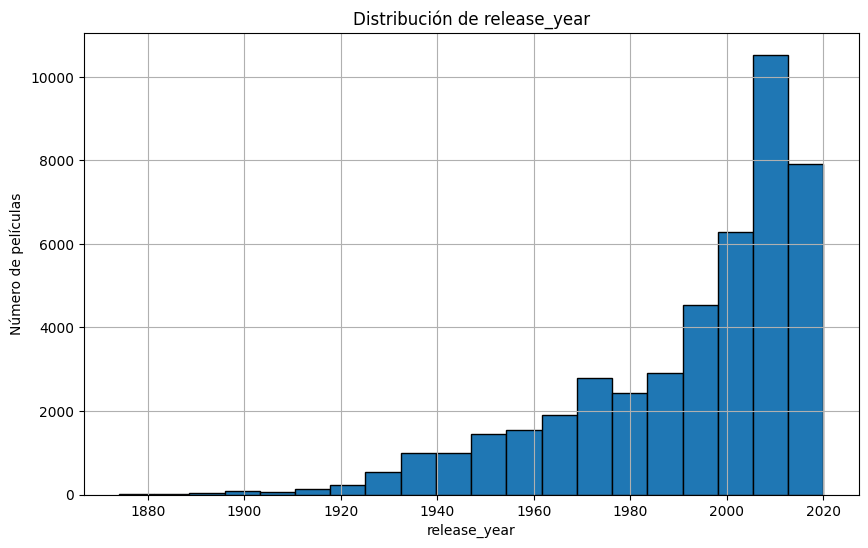

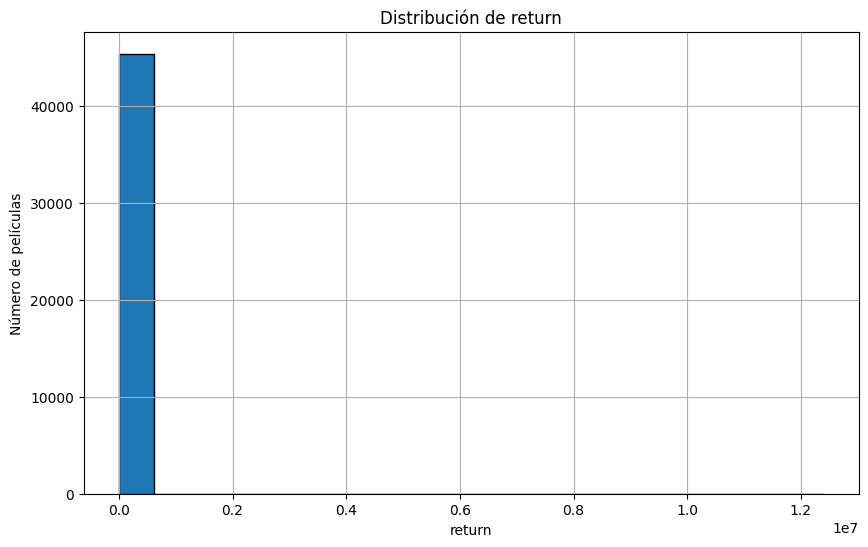

In [25]:
# Lista de columnas numéricas para analizar
numeric_columns = [
    'popularity', 
    'revenue', 
    'runtime', 
    'vote_average', 
    'vote_count', 
    'release_year', 
    'return'
]

# Crear histograma para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dfMoviesFinal[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Número de películas')
    plt.grid(True)
    plt.show()

In [26]:
# Función para crear intervalos y contar
def categorize_and_count(df, column, bins):
    df[column + '_interval'] = pd.cut(df[column], bins=bins, include_lowest=True)
    return df[column + '_interval'].value_counts()

# Definir intervalos para cada columna
bins_dict = {
    'popularity': np.linspace(dfMoviesFinal['popularity'].min(), dfMoviesFinal['popularity'].max(), 10),
    'revenue': np.linspace(dfMoviesFinal['revenue'].min(), dfMoviesFinal['revenue'].max(), 10),
    'runtime': np.linspace(dfMoviesFinal['runtime'].min(), dfMoviesFinal['runtime'].max(), 10),
    'vote_average': np.linspace(dfMoviesFinal['vote_average'].min(), dfMoviesFinal['vote_average'].max(), 10),
    'vote_count': np.linspace(dfMoviesFinal['vote_count'].min(), dfMoviesFinal['vote_count'].max(), 10),
    'release_year': np.linspace(dfMoviesFinal['release_year'].min(), dfMoviesFinal['release_year'].max(), 10),
    'return': np.linspace(dfMoviesFinal['return'].min(), dfMoviesFinal['return'].max(), 10)
}

# Aplicar categorización y contar
for column, bins in bins_dict.items():
    print(f"\nDistribución en intervalos para {column}:")
    print(categorize_and_count(dfMoviesFinal, column, bins))


Distribución en intervalos para popularity:
popularity_interval
(-0.001, 60.832]      45318
(60.832, 121.664]        12
(121.664, 182.496]        7
(182.496, 243.328]        6
(243.328, 304.16]         2
(486.656, 547.488]        1
(304.16, 364.992]         0
(364.992, 425.824]        0
(425.824, 486.656]        0
Name: count, dtype: int64

Distribución en intervalos para revenue:
revenue_interval
(-0.001, 309773898.556]             44964
(309773898.556, 619547797.111]        262
(619547797.111, 929321695.667]         81
(929321695.667, 1239095594.222]        29
(1239095594.222, 1548869492.778]        7
(1548869492.778, 1858643391.333]        1
(1858643391.333, 2168417289.889]        1
(2478191188.444, 2787965087.0]          1
(2168417289.889, 2478191188.444]        0
Name: count, dtype: int64

Distribución en intervalos para runtime:
runtime_interval
(-0.001, 139.556]      43253
(139.556, 279.111]      1957
(279.111, 418.667]        88
(418.667, 558.222]        26
(558.222, 697.778] 

C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\2569210902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_interval'] = pd.cut(df[column], bins=bins, include_lowest=True)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\2569210902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_interval'] = pd.cut(df[column], bins=bins, include_lowest=True)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\2569210902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [27]:
# Lista de columnas numéricas para analizar
numeric_columns = [
    'popularity', 
    'revenue', 
    'runtime', 
    'vote_average', 
    'vote_count', 
    'release_year', 
    'return'
]

# Crear un DataFrame temporal para almacenar los resultados de los intervalos
intervals_summary = pd.DataFrame()

# Crear intervalos y contar observaciones para cada columna numérica
for column in numeric_columns:
    # Definir los intervalos usando linspace
    min_val = dfMoviesFinal[column].min()
    max_val = dfMoviesFinal[column].max()
    bins = np.linspace(min_val, max_val, 11)  # Crear 10 intervalos
    
    # Imputar valores faltantes temporalmente para asegurar que todos los datos se incluyan en los intervalos
    df_temp = dfMoviesFinal[[column]].copy()
    df_temp[column].fillna(min_val, inplace=True)
    
    # Categorizar los datos en los intervalos
    df_temp[column + '_interval'] = pd.cut(df_temp[column], bins=bins, include_lowest=True)
    
    # Contar cuántas observaciones hay en cada intervalo
    interval_counts = df_temp[column + '_interval'].value_counts().sort_index()
    
    # Crear un DataFrame temporal para almacenar los intervalos y sus frecuencias
    temp_df = pd.DataFrame({
        'Intervalo': interval_counts.index,
        'Frecuencia': interval_counts.values
    })
    
    # Añadir la columna de intervalos al DataFrame principal
    temp_df['Columna'] = column
    
    # Concatenar los resultados al DataFrame principal
    intervals_summary = pd.concat([intervals_summary, temp_df], ignore_index=True)

# Imprimir los resultados
for column in numeric_columns:
    print(f"\nDistribución para la columna {column}:")
    column_summary = intervals_summary[intervals_summary['Columna'] == column]
    for _, row in column_summary.iterrows():
        print(f"{row['Intervalo']}: {row['Frecuencia']} películas")

    print()  # Línea en blanco para separar las distribuciones




Distribución para la columna popularity:
(-0.001, 54.749]: 45315 películas
(54.749, 109.498]: 15 películas
(109.498, 164.246]: 7 películas
(164.246, 218.995]: 5 películas
(218.995, 273.744]: 1 películas
(273.744, 328.493]: 2 películas
(328.493, 383.242]: 0 películas
(383.242, 437.991]: 0 películas
(437.991, 492.739]: 0 películas
(492.739, 547.488]: 1 películas


Distribución para la columna revenue:
(-0.001, 278796508.7]: 44904 películas
(278796508.7, 557593017.4]: 299 películas
(557593017.4, 836389526.1]: 87 películas
(836389526.1, 1115186034.8]: 40 películas
(1115186034.8, 1393982543.5]: 9 películas
(1393982543.5, 1672779052.2]: 4 películas
(1672779052.2, 1951575560.9]: 1 películas
(1951575560.9, 2230372069.6]: 1 películas
(2230372069.6, 2509168578.3]: 0 películas
(2509168578.3, 2787965087.0]: 1 películas


Distribución para la columna runtime:
(-0.001, 125.6]: 41456 películas
(125.6, 251.2]: 3713 películas
(251.2, 376.8]: 115 películas
(376.8, 502.4]: 33 películas
(502.4, 628.0]: 1

C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\2239448878.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp[column].fillna(min_val, inplace=True)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16368\2239448878.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [29]:
# Filtrar el DataFrame para mantener solo las filas donde 'original_language' es 'en'
dfMoviesFinal = dfMoviesFinal[dfMoviesFinal['original_language'] == 'en']

In [30]:
# Eliminar columnas que no voy a usar en la funcion de recomendacion
dfMoviesFinal = dfMoviesFinal.drop(
    columns=['popularity', 'runtime', 'tagline', 'name_production_companies', 'name_production_countries', 'original_language' ]
)

In [31]:
dfMoviesFinal = dfMoviesFinal.drop(
    columns=['popularity_interval', 'revenue_interval', 'runtime_interval', 'vote_average_interval', 'vote_count_interval', 'release_year_interval', 'return_interval' ]
)

In [32]:
dfMoviesFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32184 entries, 0 to 581956
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        32184 non-null  float64
 1   id_pelicula   32184 non-null  int64  
 2   overview      32184 non-null  object 
 3   release_date  32184 non-null  object 
 4   revenue       32184 non-null  int64  
 5   title         32184 non-null  object 
 6   vote_average  32184 non-null  float64
 7   vote_count    32184 non-null  float64
 8   release_year  32184 non-null  float64
 9   return        32184 non-null  float64
 10  name_genres   32184 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 2.9+ MB


In [59]:
dfCastFinal.info() # 0, 3
# borrar 1, 2 , 4.

<class 'pandas.core.frame.DataFrame'>
Index: 386503 entries, 0 to 7188068
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_pelicula     386503 non-null  object
 1   character_cast  374967 non-null  object
 2   gender_cast     386502 non-null  object
 3   name_cast       386502 non-null  object
 4   order_cast      386502 non-null  object
dtypes: object(5)
memory usage: 17.7+ MB


In [60]:
dfCastFinal = dfCastFinal.drop(columns=['character_cast', 'gender_cast', 'order_cast'])

In [68]:
dfCastFinal.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 386503 entries, 0 to 7188068
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id_pelicula  386503 non-null  object
 1   name_cast    386502 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [62]:
dfCrewFinal.info()
#  1

<class 'pandas.core.frame.DataFrame'>
Index: 12169 entries, 0 to 7187974
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_pelicula  12169 non-null  object
 1   gender_crew  12169 non-null  object
 2   job_crew     12169 non-null  object
 3   name_crew    12169 non-null  object
dtypes: object(4)
memory usage: 475.4+ KB


In [63]:
dfCrewFinal = dfCrewFinal.drop(columns=['gender_crew'])

In [67]:
dfCrewFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12169 entries, 0 to 7187974
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_pelicula  12169 non-null  object
 1   job_crew     12169 non-null  object
 2   name_crew    12169 non-null  object
dtypes: object(3)
memory usage: 380.3+ KB


In [69]:
# Convertir 'id_pelicula' a tipo string si es necesario
dfCastFinal['id_pelicula'] = dfCastFinal['id_pelicula'].astype(str)
dfMoviesFinal['id_pelicula'] = dfMoviesFinal['id_pelicula'].astype(str)

# Crear una copia de dfCastFinal
dfCastFinal_filtered = dfCastFinal[dfCastFinal['id_pelicula'].isin(dfMoviesFinal['id_pelicula'])].copy()


In [71]:
dfCastFinal_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308297 entries, 0 to 7187969
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id_pelicula  308297 non-null  object
 1   name_cast    308296 non-null  object
dtypes: object(2)
memory usage: 7.1+ MB


In [64]:
dfMoviesFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32184 entries, 0 to 581956
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        32184 non-null  float64
 1   id_pelicula   32184 non-null  int64  
 2   overview      32184 non-null  object 
 3   release_date  32184 non-null  object 
 4   revenue       32184 non-null  int64  
 5   title         32184 non-null  object 
 6   vote_average  32184 non-null  float64
 7   vote_count    32184 non-null  float64
 8   release_year  32184 non-null  float64
 9   return        32184 non-null  float64
 10  name_genres   32184 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 2.9+ MB


In [73]:
dfMoviesFinal

,budget,id_pelicula,overview,release_date,revenue,title,vote_average,vote_count,release_year,return,name_genres
0,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,373554033,Toy Story,7.7,5415.0,1995.0,12.451801,Animation
12,65000000.0,8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249,Jumanji,6.9,2413.0,1995.0,4.043035,Adventure
30,0.0,15602,A family wedding reignites the ancient feud be...,1995-12-22,0,Grumpier Old Men,6.5,92.0,1995.0,0.000000,Romance
46,16000000.0,31357,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,81452156,Waiting to Exhale,6.1,34.0,1995.0,5.090760,Comedy
49,0.0,11862,Just when George Banks has recovered from his ...,1995-02-10,76578911,Father of the Bride Part II,5.7,173.0,1995.0,0.000000,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
581902,0.0,222848,It's the year 3000 AD. The world's most danger...,1995-01-01,0,Caged Heat 3000,3.5,1.0,1995.0,0.000000,Science Fiction
581903,0.0,30840,"Yet another version of the classic epic, with ...",1991-05-13,0,Robin Hood,5.7,26.0,1991.0,0.000000,Drama
581952,0.0,67758,"When one of her hits goes wrong, a professiona...",2003-08-01,0,Betrayal,3.8,6.0,2003.0,0.000000,Action
581955,0.0,227506,"In a small town live two brothers, one a minis...",1917-10-21,0,Satan Triumphant,0.0,0.0,1917.0,0.000000,Desconocido


In [74]:
# Guardar Archivos definitivos para usar en la API
dfMoviesFinal.to_parquet('DataSets/dfMoviesSintetico.parquet')
dfCrewFinal.to_parquet('DataSets/dfCrew.parquet', engine='pyarrow')
dfCastFinal_filtered.to_parquet('DataSets/dfCastFinal.parquet', engine='pyarrow')